# Procesado Espectros Raman Sonda 532nm

In [1]:
import numpy as np
import pandas as pd
#%matplotlib inline
import re
import os
import math
import numpy as np
import pandas as pd
import joblib
import warnings
import time
import matplotlib.pyplot as plt

In [2]:
# Ruta que contiene todos los archivos
folder_path = "D:/OneDrive - UNICAN/LIBS/raman/ConchasArq"
# Directorios de medida
directories = [directory for directory in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, directory)) and directory != "Fotos"]


In [22]:
# Ruta que contiene todos los archivos
folder_path = "D:/OneDrive - UNICAN/LIBS/raman/ConchasArq"
# Directorios de medida
directories = [directory for directory in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, directory)) and directory != "Fotos"]

for directory in directories :
    archivos = os.listdir(os.path.join(folder_path, directory))
    print(f"Directorio {directory} contiene {archivos}")

directories

directories_test = ['09042024-160856_conchas_532nm_LIT1_n10_1000ms_0.05mm_50p_atras','10042024-103809_conchas_532nm_LIT2_n10_1000ms_0.05mm_50p_atras',
 '10042024-152046_conchas_532nm_LIT3_n10_1000ms_0.05mm_50_atras',
 '11042024-162047_conchas_532nm_LIT4_n10_1000ms_0.05mm_50p_caraabajo',
 '17042024-150606_conchas_532nm_LIT5_n10_1000ms_0.05mm_50p_atras',
 '17042024-184049_conchas_532nm_LIT6_n10_1000ms_0.15mm_50p_cara']

Directorio 09042024-160856_conchas_532nm_LIT1_n10_1000ms_0.05mm_50p_atras contiene ['AfterPhoto.png', 'autoRaman_v24.m', 'BeforePhoto.png', 'experiment.txt', 'exported_preproc_exported.csv', 'exported_raw_exported.csv', 'matlabData.mat', 'polygon.mat', 'procesaRaman_v17_18042024-120353.m', 'recorded_path.mat', 'stitchedImage.fig', 'stitchedImage.png', 'ventana_ratio.png']
Directorio 10042024-103809_conchas_532nm_LIT2_n10_1000ms_0.05mm_50p_atras contiene ['AfterPhoto.png', 'autoRaman_v25.m', 'BeforePhoto.png', 'experiment.txt', 'exported_preproc_exported.csv', 'exported_raw_exported.csv', 'matlabData.mat', 'polygon.mat', 'procesaRaman_v17_10042024-135832.m', 'recorded_path.mat', 'stitchedImage.fig', 'stitchedImage.png', 'ventana_ratio.png']
Directorio 10042024-152046_conchas_532nm_LIT3_n10_1000ms_0.05mm_50_atras contiene ['AfterPhoto.png', 'autoRaman_v25.m', 'BeforePhoto.png', 'experiment.txt', 'exported_preproc_exported.csv', 'exported_raw_exported.csv', 'matlabData.mat', 'polygon.mat'

In [3]:

def preprocesado_raw(df,bg):
    # Restamos el background
    df = df.sub(bg.iloc[0], axis=1)
    # Normalizamos
    df = df.div(df.max(axis=1), axis=0)
    return df

def create_df_raw(folder_path, folder_names):
    dataframes = []
    lista_archivos = []
    lista_muestras = []
    background = []
    for folder in folder_names:
        path = os.path.join(folder_path, folder)
        if not os.path.exists(os.path.join(path, 'exported_raw_exported.csv')):
            print('No exported files found in', folder)
            continue
        print('Processing', folder)
        csv_files = [f for f in os.listdir(path) if f.endswith('exported_raw_exported.csv')]

        # Lee los archivos csv y los concatena en un solo DataFrame
        for csv_file in csv_files:
            df = pd.read_csv(os.path.join(path, csv_file), skiprows=[1], header=0)
            bg = pd.read_csv(os.path.join(path, csv_file), nrows=1)
            # print((os.path.join(path, csv_file)))
            nombre_archivo = folder+'_'+ csv_file.split("_")[1] # Nombre del archivo
            nombre_muestra = folder.split("_")[2] # Nombre de la muestra
            fecha_medida = folder.split("_")[0].split("-")[0]   # Fecha de la medida
            hora_medida = folder.split("_")[0].split("-")[1]    # Hora de la medida
            tipo = csv_file.split("_")[1]#.split("-")[0]    # Tipo de medida (preproc, raw)
            df.index = pd.MultiIndex.from_tuples([( nombre_muestra, tipo, fecha_medida,hora_medida, nombre_archivo, X, Y, ) for X, Y in df.index],
                                                   names=[ "Muestra", "Tipo", "Fecha","Hora", "Archivo","X", "Y"])
            # Guardamos el nombre de los archivos y de las muestras en lsitas
            lista_archivos.append(nombre_archivo)
            lista_muestras.append(nombre_muestra)
            # Agrega el DataFrame a la lista

            # Preprocesamos el DataFrame 
            preprocesado_raw(df,bg)
            dataframes.append(df)
            background.append(bg)

    # Concatena todos los DataFrames en uno solo
    data = pd.concat(dataframes)
    return lista_archivos, lista_muestras


In [6]:
df_background = pd.read_csv('D:/OneDrive - UNICAN/LIBS/raman/ConchasArq/09042024-160856_conchas_532nm_LIT1_n10_1000ms_0.05mm_50p_atras/exported_raw_exported.csv', nrows=1)

df = pd.read_csv('D:/OneDrive - UNICAN/LIBS/raman/ConchasArq/09042024-160856_conchas_532nm_LIT1_n10_1000ms_0.05mm_50p_atras/exported_raw_exported.csv', skiprows=[1], header=0)


In [9]:
df_background 

,-27.19,-23.36,-19.54,-15.72,-11.9,-8.08,-4.27,-0.46,3.35,7.16,...,2919.78,2921.86,2923.95,2926.03,2928.11,2930.19,2932.27,2934.34,2936.42,2938.5
0,1627.88,1621.13,1619.38,1618.25,1629,1632.25,1629.25,1634.5,1633.63,1636.13,...,1643,1645.63,1640.5,1637.88,1637.38,1635.13,1619.5,1619.38,1618.88,1618.25


In [10]:
df

,,-27.19,-23.36,-19.54,-15.72,-11.9,-8.08,-4.27,-0.46,3.35,7.16,...,2919.78,2921.86,2923.95,2926.03,2928.11,2930.19,2932.27,2934.34,2936.42,2938.5
-6.186,4.347,1628.1,1622.5,1618.4,1617.5,1668.9,1738.0,2028.6,2227.2,2014.7,1731.5,...,10626.1,10509.2,10370.4,10243.3,10105.0,9957.2,1620.1,1619.4,1618.5,1618.6
-6.136,4.347,1628.0,1620.0,1618.1,1617.2,1664.5,1724.8,2007.5,2228.4,2036.6,1738.0,...,10042.7,9933.5,9815.1,9702.2,9561.9,9433.1,1620.7,1619.2,1618.6,1617.4
-6.086,4.347,1627.4,1621.2,1619.1,1617.9,1667.4,1729.5,2024.1,2259.4,2067.1,1749.1,...,10517.4,10406.1,10287.1,10133.1,10012.3,9892.9,1620.7,1619.9,1619.0,1618.8
-6.036,4.347,1626.3,1621.5,1618.1,1617.3,1664.3,1721.1,2014.5,2274.2,2095.5,1755.6,...,10129.6,10005.2,9905.2,9737.7,9643.7,9499.0,1620.8,1619.1,1618.4,1618.3
-5.986,4.347,1627.0,1620.4,1618.5,1618.3,1662.4,1718.1,2009.1,2271.8,2086.5,1746.9,...,9440.4,9327.9,9187.7,9116.2,8992.1,8875.4,1620.1,1618.5,1618.7,1619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4.686,5.347,1627.7,1620.5,1618.4,1619.3,1659.8,1713.9,2014.2,2303.9,2121.7,1752.6,...,9011.2,8888.2,8790.7,8683.0,8576.2,8469.5,1619.5,1619.0,1618.0,1620.0
-4.636,5.347,1627.6,1620.5,1619.8,1617.9,1660.1,1719.5,2054.0,2388.9,2196.2,1774.5,...,8897.5,8803.3,8694.4,8598.3,8500.4,8361.5,1620.5,1619.4,1618.2,1619.3
-4.586,5.347,1628.4,1622.0,1618.2,1618.3,1661.7,1715.9,2007.7,2295.5,2101.1,1753.2,...,9237.2,9158.4,9039.9,8922.3,8809.1,8714.2,1620.4,1619.9,1618.3,1618.8
-4.536,5.347,1627.7,1621.5,1617.4,1617.3,1660.9,1712.6,1999.7,2297.4,2112.6,1755.4,...,9817.6,9710.9,9584.0,9446.1,9339.9,9216.4,1619.4,1619.6,1619.4,1619.1


In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, Normalizer
from scipy.linalg import solveh_banded  # para hacer ALS
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import argrelextrema
from itertools import product
from scipy.signal import savgol_filter
from functools import reduce
class WhittakerSmoother(object):
    def __init__(self, signal, smoothness_param, deriv_order=1):
        self.y = signal
        assert deriv_order > 0, 'deriv_order must be an int > 0'
        # Compute the fixed derivative of identity (D).
        d = np.zeros(deriv_order*2 + 1, dtype=int)
        d[deriv_order] = 1
        d = np.diff(d, n=
        deriv_order)
        n = self.y.shape[0]
        k = len(d)
        s = float(smoothness_param)
        # Here be dragons: essentially we're faking a big banded matrix D,
        # doing s * D.T.dot(D) with it, then taking the upper triangular bands.
        diag_sums = np.vstack([
            np.pad(s*np.cumsum(d[-i:]*d[:i]), ((k-i,0),), 'constant')
            for i in range(1, k+1)])
        upper_bands = np.tile(diag_sums[:,-1:], n)
        upper_bands[:,:k] = diag_sums
        for i,ds in enumerate(diag_sums):
            upper_bands[i,-i-1:] = ds[::-1][:i+1]
        self.upper_bands = upper_bands
    def smooth(self, w):
        foo = self.upper_bands.copy()
        foo[-1] += w  # last row is the diagonal
        return solveh_banded(foo, w * self.y, overwrite_ab=True, overwrite_b=True)

def als_baseline(intensities, asymmetry_param=0.0001, smoothness_param=1e4,
                 max_iters=20, conv_thresh=1e-6, verbose=False):
    """
    Applies the asymmetric least squares (ALS) method to fit the baseline.

    Parameters:
    - intensities (numpy.ndarray or pandas.Series): Numpy array or pandas Series representing the Raman intensities.
    - asymmetry_param (float): Asymmetry parameter for the fit.
    - smoothness_param (float): Smoothness parameter for the fit.
    - max_iters (int): Maximum number of iterations.
    - conv_thresh (float): Convergence threshold.
    - verbose (bool): Flag to print debugging information.

    Returns:
    - baseline (numpy.ndarray): Numpy array representing the fitted baseline.
    """
    if isinstance(intensities, pd.Series):
        intensities = intensities.values

    smoother = WhittakerSmoother(intensities, smoothness_param, deriv_order=2)
    p = asymmetry_param
    w = np.ones(intensities.shape[0])

    for i in range(max_iters):
        z = smoother.smooth(w)
        mask = intensities > z
        new_w = p * mask + (1 - p) * (~mask)
        conv = np.linalg.norm(new_w - w)

        if verbose:
            print(i + 1, conv)

        if conv < conv_thresh:
            break

        w = new_w
    else:
        print('ALS did not converge in %d iterations' % max_iters)

    return z

def remove_background(df, bg):
    D0_BG = df.sub(bg.iloc[0], axis=1)
    return D0_BG

def find_baseline(df):
    """
    Apply baseline correction to each row in a DataFrame.
    Input:
        df: DataFrame, contains the spectral data.
    Output:
        DataFrame, with baseline corrected for each spectrum.
    """
    D0_BL = df.copy()
    for i in range(len(df)):
        # Apply ALS baseline correction to each row
        bl = als_baseline(df.iloc[i, :].values)
        D0_BL.iloc[i, :] = bl
    return D0_BL

def correct_baseline(data, baseline):
    """
    Corrects the baseline of the data.
    Parameters:
    - data (pandas.DataFrame or pandas.Series): DataFrame or Series containing the data.
    - baseline (pandas.DataFrame or pandas.Series): DataFrame or Series with the baselines.
    Returns:
    - corrected_data (pandas.DataFrame): DataFrame with the corrected data.
    """
    # Ensure that both data and baseline are DataFrames
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)

    if not isinstance(baseline, pd.DataFrame):
        baseline = pd.DataFrame(baseline)

    # Perform baseline correction
    corrected_data = data.values - baseline.values

    # Convert the result back to a DataFrame while maintaining the same column names
    corrected_data = pd.DataFrame(corrected_data, columns=data.columns).copy()

    return corrected_data

def normalize_spectra(X_filtered):
    """
    Preprocessing of spectral data.
    Input:
        X_filtered: DataFrame, raw spectral data.
    Output:
        DataFrame, preprocessed spectral data.
    """
    X_norm_list = []
    for _, row in X_filtered.iterrows():
        # Normalize each spectrum by dividing by the sum and multiplying by a constant
        total = np.sum(row)
        X_norm_list.append(pd.DataFrame([row / total * 2000]))

    X_norm = pd.concat(X_norm_list, ignore_index=True)

    # Apply Savitzky-Golay filter for smoothing
    X_norm_flt = savgol_filter(X_norm, 21, 2)
    X_norm_flt = pd.DataFrame(X_norm_flt, columns=X_filtered.columns)

    '''# Perform baseline correction
    bl = find_baseline(X_norm_flt)
    X_norm_flt = X_norm_flt - bl'''

    # Standardize the data using StandardScaler
    scaler = StandardScaler()
    z_numpy = X_norm_flt.values
    z_numpy_scaled_rows = scaler.fit_transform(z_numpy.T).T
    X_norm_flt_stdz = pd.DataFrame(data=z_numpy_scaled_rows, columns=X_filtered.columns)

    return X_norm_flt_stdz

def preprocesado_raw(D_sonda,bg_sonda):

    D_BG_sonda = remove_background(D_sonda, bg_sonda)
    # Find baseline of Raman spectra data
    D_BL_sonda = find_baseline(D_BG_sonda)
    # Correct baseline of Raman spectra data
    D_BC_sonda = correct_baseline(D_sonda, D_BL_sonda)
    # Normalize Raman spectra data
    D_PP_sonda = normalize_spectra(D_BC_sonda)

    return df

# df_preproc = preprocesado_raw(df,df_background)

df_background = pd.read_csv('D:/OneDrive - UNICAN/LIBS/raman/ConchasArq/09042024-160856_conchas_532nm_LIT1_n10_1000ms_0.05mm_50p_atras/exported_raw_exported.csv', nrows=1)

df = pd.read_csv('D:/OneDrive - UNICAN/LIBS/raman/ConchasArq/09042024-160856_conchas_532nm_LIT1_n10_1000ms_0.05mm_50p_atras/exported_raw_exported.csv', skiprows=[1], header=0)

df_background_preproc = remove_background(df, df_background)

ALS did not converge in 20 iterations
ALS did not converge in 20 iterations
ALS did not converge in 20 iterations
ALS did not converge in 20 iterations


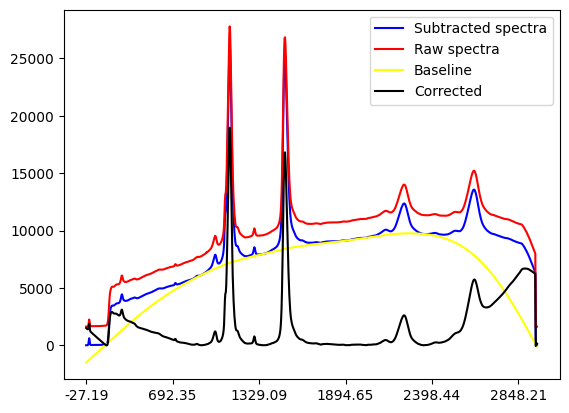

In [53]:
def subtract (df, df_background):
    df_subtracted = df.sub(df_background.iloc[0], axis=1)
    return df_subtracted
# df_subtracted = df.sub(df_background.iloc[0], axis=1)
# df_media = df_subtracted.mean(axis=0)
# df_media.plot()

df_subtracted = subtract(df, df_background)
df_media = df_subtracted.mean(axis=0)
df_media.plot(label='Subtracted spectra', color='blue')

df.mean(axis=0).plot(label='Raw spectra', color='red')

def find_baseline_2(series):
    """
    Apply baseline correction to a Series.
    Input:
        series: pandas Series, contains the spectral data.
    Output:
        Series, with baseline corrected.
    """
    # Apply ALS baseline correction to the series
    bl = als_baseline(series.values)
    return pd.Series(bl, index=series.index)



df_media_find_baseline_2 = find_baseline_2(df_subtracted.mean(axis=0))
df_media_find_baseline = find_baseline(df_subtracted)
df_media_find_baseline.mean(axis=0).plot(color='yellow', label='Baseline')
# df_media_find_baseline_2.plot(color='green')

df_media_corrected = correct_baseline(df_subtracted, df_media_find_baseline)
df_media_corrected.mean(axis=0).plot(color = 'black', label='Corrected')

df_media_normalized = normalize_spectra(df_media_corrected)

plt.legend()
# df_media_normalized.mean(axis=0).plot(color = 'red')

<Axes: >

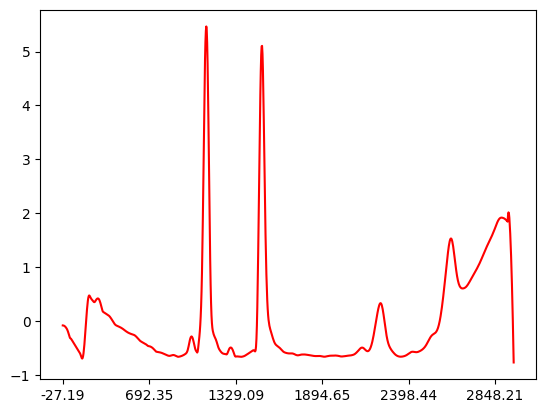

In [49]:
df_media_normalized.mean(axis=0).plot(color = 'red')

In [8]:
df_fin = preprocesado_raw(df,df_background)
df_fin

,,-27.19,-23.36,-19.54,-15.72,-11.9,-8.08,-4.27,-0.46,3.35,7.16,...,2919.78,2921.86,2923.95,2926.03,2928.11,2930.19,2932.27,2934.34,2936.42,2938.5
-6.186,4.347,0.000007,0.000044,-0.000031,-0.000024,0.001279,0.003390,0.012801,0.018998,0.012215,0.003057,...,0.287941,0.284110,0.279825,0.275835,0.271418,0.266753,0.000019,6.410735e-07,-0.000012,0.000011
-6.136,4.347,0.000004,-0.000038,-0.000043,-0.000035,0.001180,0.003077,0.012574,0.019743,0.013396,0.003387,...,0.279237,0.275520,0.271754,0.268088,0.263441,0.259234,0.000040,-5.983869e-06,-0.000009,-0.000028
-6.086,4.347,-0.000016,0.000002,-0.000009,-0.000011,0.001257,0.003184,0.012928,0.020461,0.014193,0.003699,...,0.290566,0.286836,0.283107,0.278151,0.274212,0.270376,0.000039,1.702586e-05,0.000004,0.000018
-6.036,4.347,-0.000054,0.000013,-0.000044,-0.000032,0.001206,0.003035,0.013158,0.021848,0.015775,0.004080,...,0.289851,0.285513,0.282272,0.276641,0.273448,0.268582,0.000044,-9.563113e-06,-0.000016,0.000002
-5.986,4.347,-0.000031,-0.000025,-0.000031,0.000002,0.001166,0.002996,0.013257,0.022242,0.015805,0.003866,...,0.272132,0.268114,0.263400,0.260996,0.256683,0.252688,0.000021,-3.071235e-05,-0.000006,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4.686,5.347,-0.000006,-0.000021,-0.000033,0.000035,0.001037,0.002750,0.012964,0.022544,0.016437,0.003922,...,0.248144,0.243913,0.240802,0.237263,0.233683,0.230166,0.000000,-1.279751e-05,-0.000030,0.000059
-4.636,5.347,-0.000009,-0.000021,0.000014,-0.000012,0.001042,0.002922,0.014226,0.025268,0.018843,0.004635,...,0.242981,0.239738,0.236262,0.233131,0.229869,0.225292,0.000033,6.698760e-07,-0.000023,0.000035
-4.586,5.347,0.000018,0.000030,-0.000040,0.000002,0.001110,0.002840,0.012850,0.022445,0.015873,0.003975,...,0.257864,0.255099,0.251250,0.247346,0.243519,0.240373,0.000031,1.765682e-05,-0.000020,0.000019
-4.536,5.347,-0.000006,0.000013,-0.000069,-0.000033,0.001115,0.002808,0.012944,0.023163,0.016736,0.004168,...,0.285640,0.281819,0.277565,0.272838,0.269144,0.264907,-0.000003,7.687316e-06,0.000018,0.000030


In [19]:
tipo_medida = 'all'
for folder in directories:
                path = os.path.join(folder_path, folder)
                if not os.path.exists(os.path.join(path, 'exported_preproc_exported.csv')) and not os.path.exists(os.path.join(path, 'exported_raw_exported.csv')):
                    print('No exported files found in', folder)
                    continue
                print('Processing', folder)
                # Lista de archivos en el directorio en función del tipo (all, exported_preproc_exported, exported_raw_exported)
                if tipo_medida == "all":
                    csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
                    print(csv_files)
                elif tipo_medida == "exported_preproc_exported" or tipo_medida == "exported_raw_exported":
                    csv_files = [f for f in os.listdir(path) if f.endswith(f'{tipo_medida}.csv')]
                    print(csv_files)

                for csv_file in csv_files:
                    print((os.path.join(path, csv_file)))

No exported files found in 09042024-160856_conchas_532nm_LIT1_n10_1000ms_0.05mm_50p_atras
Processing 10042024-103809_conchas_532nm_LIT2_n10_1000ms_0.05mm_50p_atras
['exported_preproc_exported.csv', 'exported_raw_exported.csv']
D:/OneDrive - UNICAN/LIBS/raman/ConchasArq\10042024-103809_conchas_532nm_LIT2_n10_1000ms_0.05mm_50p_atras\exported_preproc_exported.csv
D:/OneDrive - UNICAN/LIBS/raman/ConchasArq\10042024-103809_conchas_532nm_LIT2_n10_1000ms_0.05mm_50p_atras\exported_raw_exported.csv
Processing 10042024-152046_conchas_532nm_LIT3_n10_1000ms_0.05mm_50_atras
['exported_preproc_exported.csv', 'exported_raw_exported.csv']
D:/OneDrive - UNICAN/LIBS/raman/ConchasArq\10042024-152046_conchas_532nm_LIT3_n10_1000ms_0.05mm_50_atras\exported_preproc_exported.csv
D:/OneDrive - UNICAN/LIBS/raman/ConchasArq\10042024-152046_conchas_532nm_LIT3_n10_1000ms_0.05mm_50_atras\exported_raw_exported.csv
Processing 11042024-162047_conchas_532nm_LIT4_n10_1000ms_0.05mm_50p_caraabajo
['exported_preproc_export

In [28]:
def create_df_sonda_raw(folder_names, folder_path = "Data"):
    dataframes = []
    lista_archivos = []
    lista_muestras = []
    background = []
    for folder in folder_names:
        path = os.path.join(folder_path, folder)

        # Lista de archivos en el directorio en función del tipo (all, exported_preproc_exported, exported_raw_exported)
        if type == "all":
            csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
        elif type == "exported_preproc_exported" or type == "exported_raw_exported":
            csv_files = [f for f in os.listdir(path) if f.endswith(f'{type}.csv')]

        # Lee los archivos csv y los concatena en un solo DataFrame
        for csv_file in csv_files:
            # df = pd.read_csv(os.path.join(path, csv_file))
            print((os.path.join(path, csv_file)))
            # nombre_archivo = folder+'_'+ csv_file.split("_")[1] # Nombre del archivo
            # nombre_muestra = folder.split("_")[2] # Nombre de la muestra
            # fecha_medida = folder.split("_")[0].split("-")[0]   # Fecha de la medida
            # hora_medida = folder.split("_")[0].split("-")[1]    # Hora de la medida
            # tipo = csv_file.split("_")[1]#.split("-")[0]    # Tipo de medida (preproc, raw)
            # # df.index = pd.MultiIndex.from_tuples([( nombre_muestra, tipo, fecha_medida,hora_medida, nombre_archivo, X, Y, ) for X, Y in df.index],
            # #                                       names=[ "Muestra", "Tipo", "Fecha","Hora", "Archivo","X", "Y"])
            # # Guardamos el nombre de los archivos y de las muestras en lsitas
            # lista_archivos.append(nombre_archivo)
            # lista_muestras.append(nombre_muestra)
            # # Agrega el DataFrame a la lista
            # # dataframes.append(df)

    # Concatena todos los DataFrames en uno solo
    # data = pd.concat(dataframes)
    return lista_archivos, lista_muestras

lista_archivos, lista_muestras = create_df_sonda(directories_test, folder_path, "exported_raw_exported")



D:/OneDrive - UNICAN/LIBS/raman/ConchasArq\09042024-160856_conchas_532nm_LIT1_n10_1000ms_0.05mm_50p_atras\exported_raw_exported.csv
D:/OneDrive - UNICAN/LIBS/raman/ConchasArq\10042024-103809_conchas_532nm_LIT2_n10_1000ms_0.05mm_50p_atras\exported_raw_exported.csv
D:/OneDrive - UNICAN/LIBS/raman/ConchasArq\10042024-152046_conchas_532nm_LIT3_n10_1000ms_0.05mm_50_atras\exported_raw_exported.csv
D:/OneDrive - UNICAN/LIBS/raman/ConchasArq\11042024-162047_conchas_532nm_LIT4_n10_1000ms_0.05mm_50p_caraabajo\exported_raw_exported.csv
D:/OneDrive - UNICAN/LIBS/raman/ConchasArq\17042024-150606_conchas_532nm_LIT5_n10_1000ms_0.05mm_50p_atras\exported_raw_exported.csv
D:/OneDrive - UNICAN/LIBS/raman/ConchasArq\17042024-184049_conchas_532nm_LIT6_n10_1000ms_0.15mm_50p_cara\exported_raw_exported.csv


In [71]:

df_background = pd.read_csv('D:/OneDrive - UNICAN/LIBS/raman/ConchasArq/09042024-160856_conchas_532nm_LIT1_n10_1000ms_0.05mm_50p_atras/exported_raw_exported.csv', nrows=1)

df = pd.read_csv('D:/OneDrive - UNICAN/LIBS/raman/ConchasArq/09042024-160856_conchas_532nm_LIT1_n10_1000ms_0.05mm_50p_atras/exported_raw_exported.csv', skiprows=[1], header=0)


In [73]:
df_background

,-27.19,-23.36,-19.54,-15.72,-11.9,-8.08,-4.27,-0.46,3.35,7.16,...,2919.78,2921.86,2923.95,2926.03,2928.11,2930.19,2932.27,2934.34,2936.42,2938.5
0,1627.88,1621.13,1619.38,1618.25,1629,1632.25,1629.25,1634.5,1633.63,1636.13,...,1643,1645.63,1640.5,1637.88,1637.38,1635.13,1619.5,1619.38,1618.88,1618.25
